<a href="https://colab.research.google.com/github/priyanshgupta1998/Machine_learning/blob/master/Kaggle/Analysis-on-Indian-Import-Export/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis on Indian Import Export

In [0]:
!pip install squarify

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# charts
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify #TreeMap

# import graph objects as "go"

import plotly.graph_objs as go


%matplotlib inline

#ignore warning 
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
import os


In [2]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d lakshyaag/india-trade-data/kernels

  0% 0.00/1.43M [00:00<?, ?B/s]
100% 1.43M/1.43M [00:00<00:00, 100MB/s]


In [4]:
!unzip india-trade-data.zip

Archive:  india-trade-data.zip
  inflating: 2018-2010_export.csv    
  inflating: 2018-2010_import.csv    


In [12]:
for dirname, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/2018-2010_import.csv
/content/kaggle.json
/content/2018-2010_export.csv
/content/india-trade-data.zip
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/gce
/content/.config/.metricsUUID
/content/.config/logs/2019.08.27/16.17.17.407104.log
/content/.config/logs/2019.08.27/16.17.00.530950.log
/content/.config/logs/2019.08.27/16.17.21.663235.log
/content/.config/logs/2019.08.27/16.17.22.686467.log
/content/.config/logs/2019.08.27/16.17.07.367707.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [13]:
print(os.listdir())

['.config', '2018-2010_import.csv', 'kaggle.json', '2018-2010_export.csv', 'india-trade-data.zip', 'sample_data']


In [15]:
data_import = pd.read_csv("2018-2010_import.csv")
print(data_import.shape)
data_import.head()


(93095, 5)


,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


HSCode - HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped HS Code Structure

The HS code can be described as follows:

It is a six-digit identification code. It has 5000 commodity groups. Those groups have 99 chapters. Those chapters have 21 sections. It’s arranged in a legal and logical structure. Well-defined rules support it to realize uniform classification worldwide.

the HSCode in column is 99 chapters

In [16]:
data_export = pd.read_csv("2018-2010_export.csv")
print(data_export .shape)
data_export .head()

(137023, 5)


,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [17]:
data_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


> HSCode shows data is under 1 to 99 which is correct as we discussed above.

> Value is showing a huge outlier as 75 % data is below 3.7 and maximum is 19805 seems some items category are very expensive .we will research it on this in later.also min is zero as some export may be two small to roundoff in two decimal.

> Year is under 2010 to 2018 Perfect.

In [18]:
data_import.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


In [19]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [22]:
data_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [20]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [21]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

#### Purchase Value can't be Zero for any product

In [23]:
data_import[data_import.value==0].head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
20,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018
22,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.0,AFGHANISTAN TIS,2018


#### Country Name can't be unknown for any transaction

In [24]:
data_import[data_import.country == "UNSPECIFIED"].head(5)

,HSCode,Commodity,value,country,year
8263,1,LIVE ANIMALS.,NaN,UNSPECIFIED,2018
8264,2,MEAT AND EDIBLE MEAT OFFAL.,NaN,UNSPECIFIED,2018
8265,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",3.1,UNSPECIFIED,2018
8266,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.1,UNSPECIFIED,2018
8267,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,UNSPECIFIED,2018


In [25]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))

Duplicate imports : 18002
Duplicate exports : 0


#### From the Above data check we find out columns to cleanup.

> Value column has Null values.   
> Value Column has zero value.     
> Country column has unspecified value.     
> Duplicate imports rows

In [0]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

In [0]:
data_import = cleanup(data_import)
data_export = cleanup(data_export)

In [28]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54554 entries, 1 to 93090
Data columns (total 5 columns):
HSCode       54554 non-null int64
Commodity    54554 non-null object
value        54554 non-null float64
country      54554 non-null object
year         54554 non-null category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


## Commodity Analysis
>  Commodity Import Count

In [29]:
print("Import Commodity Count : "+str(len(data_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(data_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


Here find out that HSCode77 is missing.

HSCode 77 is actually reserved for Possible Future Use.

>     ...........
>     ...........
>     ...........
>     ...........

Let's do something for 'Commodity'!

Commodity count based on different import (country/year) Lets count the most popular import Commodity . popular just as no of transactions(country/year) are more for this category.

In [30]:
df = pd.DataFrame(data_import['Commodity'].value_counts())
df.head(20)    #Top 20 'commodity' items which are going to be impoort in the country

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1378
IRON AND STEEL,1333
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1314
ALUMINIUM AND ARTICLES THEREOF.,1217
PLASTIC AND ARTICLES THEREOF.,1112
COPPER AND ARTICLES THEREOF.,1058
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1009
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,983
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,983
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",900


In [31]:
print("No of Country were we are importing Comodities are "+str(len(data_import['country'].unique())))
print("No of Country were we are Exporting Comodities are "+str(len(data_export['country'].unique())))

No of Country were we are importing Comodities are 240
No of Country were we are Exporting Comodities are 246


So India is doing Trade with around 246 Countries.

According http://www.world-country.com/ there are 247 countries and territories . 192 are only recognised by United Nation.

We cannot ignored the possibilty that data can be in short form or same country represented multiple time different way.

###Import And Export Year Wise

In [81]:
#Import values 
df3 = data_import.groupby('year').agg({'value':'sum'})   # Sum up all the values/ prices of same year
print(df3.shape)
df3.head()


(9, 1)


,value
year,
2010,365444.94
2011,488272.63
2012,488805.22
2013,446095.99
2014,440463.87


In [0]:
#Export values
df4 = data_export.groupby('year').agg({'value':'sum'})

In [83]:
df3['deficit'] = df4.value - df3.value
df3     #Export is less and import is high

,value,deficit
year,,
2010,365444.94,-130033.93
2011,488272.63,-198761.05
2012,488805.22,-193858.35
2013,446095.99,-143251.86
2014,440463.87,-134304.07
2015,372291.40,-112499.98
2016,377006.72,-103641.56
2017,456379.59,-155301.41
2018,513981.62,-186830.19


In [0]:
# create trace1  for the total importing values per year
trace1 = go.Bar(
                x = df3.index,
                y = df3.value,
                name = "Import",
                marker = dict(color = 'rgba(0,191,255, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.value)



# create trace2 for the total exporting valeues per year  
trace2 = go.Bar(
                x = df4.index,
                y = df4.value,
                name = "Export",
                marker = dict(color = 'rgba(1, 255, 130, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df4.value)



# Deficit per year 
trace3 = go.Bar(
                x = df3.index,
                y = df3.deficit,
                name = "Trade Deficit",
                marker = dict(color = 'rgba(220, 20, 60, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.deficit)


data = [trace1, trace2, trace3]


In [36]:
data

[Bar({
     'marker': {'color': 'rgba(0,191,255, 1)', 'line': {'color': 'rgb(0,0,0)', 'width': 1.5}},
     'name': 'Import',
     'text': array([365444.94      , 488272.63000001, 488805.22      , 446095.99      ,
                    440463.87      , 372291.4       , 377006.72      , 456379.59000001,
                    513981.62000001]),
     'x': array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]),
     'y': array([365444.94      , 488272.63000001, 488805.22      , 446095.99      ,
                 440463.87      , 372291.4       , 377006.72      , 456379.59000001,
                 513981.62000001])
 }), Bar({
     'marker': {'color': 'rgba(1, 255, 130, 1)', 'line': {'color': 'rgb(0,0,0)', 'width': 1.5}},
     'name': 'Export',
     'text': array([235411.01, 289511.58, 294946.87, 302844.13, 306159.8 , 259791.42,
                    273365.16, 301078.18, 327151.43]),
     'x': array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]),
     'y': array([235411.01, 289511.58

In [37]:
layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

fig.update_layout(
    title=go.layout.Title(
        text="Yearwise Import/Export/Trade deficit",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)




fig.show()

> Import is always more than the export creating a trade defecit which we can see in red bar graph.  

>  2011 2012 showing a huge huge trade deficit and after which it gradually decreases till 2016 and then increased in 2017 and 2018.  




## Import And Export Country Wise

In [46]:
df5 = data_import.groupby('country').agg({'value':'sum'})
df5 = df5.sort_values(by='value', ascending = False)
df5.head()

,value
country,
CHINA P RP,532177.51
U ARAB EMTS,256286.08
SAUDI ARAB,241554.99
U S A,219276.66
SWITZERLAND,206729.03


In [47]:
df6 = data_export.groupby('country').agg({'value':'sum'})
df6 = df6.sort_values(by='value', ascending = False)
df6.head()

,value
country,
U S A,360609.57
U ARAB EMTS,289374.88
CHINA P RP,121806.00
HONG KONG,115693.35
SINGAPORE,101679.70


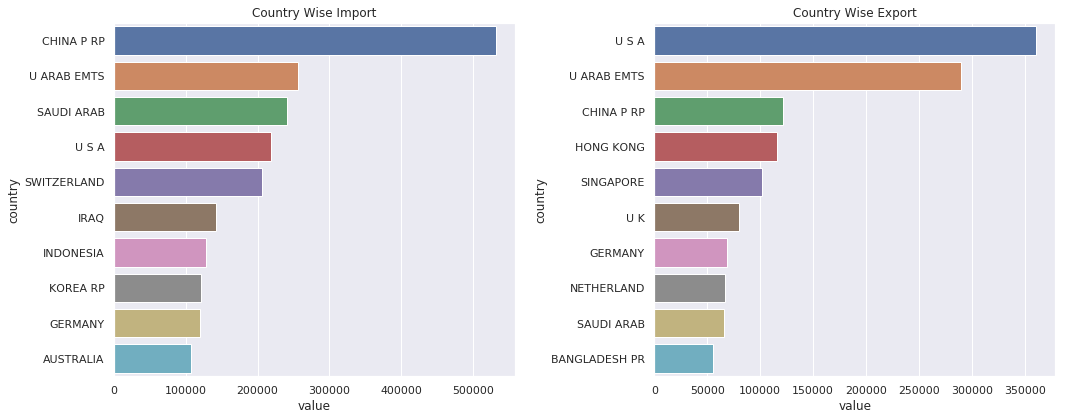

In [59]:
#For the top trading Countries
df5 = df5[:10]
df6 = df6[:10]

sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)

sns.barplot(df5.value,df5.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(df6.value,df6.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

> China has biggest market in india followed by UAE,Saudi Arabia and USA.  

> USA is our biggest importer followed by UAE and China Republic.



### Trade Defecit/Surplus Top 5 country with respect to INDIA

China - very Huge Trade Deficit for INDIA
UAE - little Trade Surplus         
Saudi Arabia- Huge Trade Deficit      
USA - little Trade Surplus       
Swizerland - not making even in the top export graph showing sign of Huge Trade Deficit.     

In [0]:
# print(data_import.country.shape)
## print all the unique countries name 
# set(list(pd.DataFrame(data_import['country'].value_counts()).index))

#Import And Export Year Wise Trend

In [95]:
#import plotly.graph_objs as go

fig = go.Figure()
# Create and style traces

#Status about the importing the commodities
fig.add_trace(go.Scatter(x=df3.index, y=df3.value, name='Import',mode='lines+markers',
                         line=dict(color='green', width=4)))



#Status about the Export the commodities
fig.add_trace(go.Scatter(x=df4.index, y=df4.value, name = 'Export',mode='lines+markers',
                         line=dict(color='royalblue', width=4)))



#About Deficit
fig.add_trace(go.Scatter(x=df3.index, y=df3.deficit, name = 'Deficit',mode='lines+markers',
                         line=dict(color='firebrick', width=4)))



fig.update_layout(
    autosize = False,
    width = 1230,
    height  = 800, 
    #margin = dict (l =20,r=20 , t=20 ,b=20),
    title=go.layout.Title(
        text="Yearwise Import/Export",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

In [96]:
#Extract the details from the import data 
df3 = data_import.groupby('Commodity').agg({'value':'sum'})
df3 = df3.sort_values(by='value', ascending = False)
df3.head()


,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1305259.28
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",611404.45
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",326602.08
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",310410.14
ORGANIC CHEMICALS,150059.05


In [97]:
#Extract the details from the export data
df4 = data_export.groupby('Commodity').agg({'value':'sum'})
df4 = df4.sort_values(by='value', ascending = False)
df4.head()

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",412501.31
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",375706.03
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",124465.27
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",123727.12
ORGANIC CHEMICALS,112712.70


In [0]:
#Take the chunks of the import / export data 
df3 = df3[:10]
df4 = df4[:10]


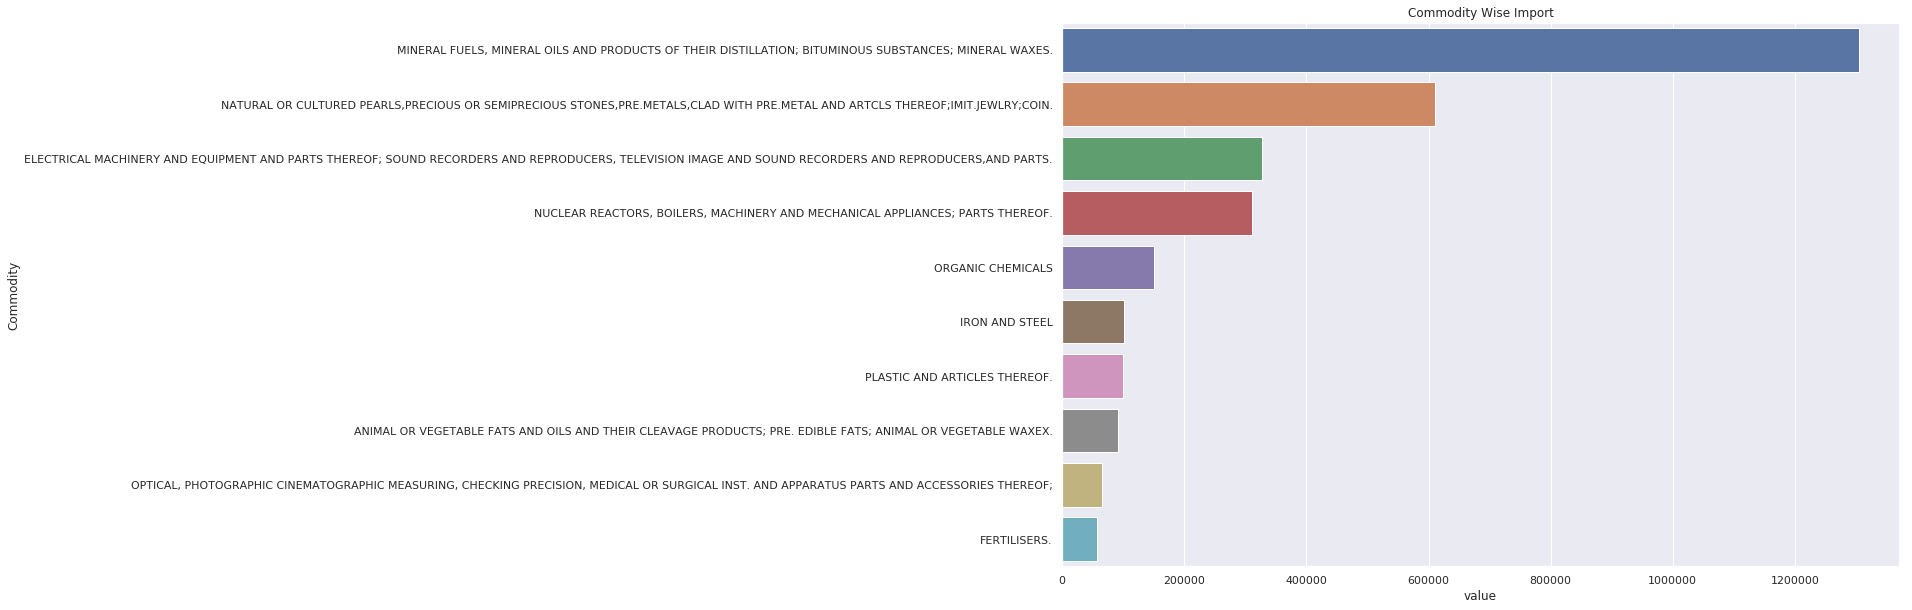

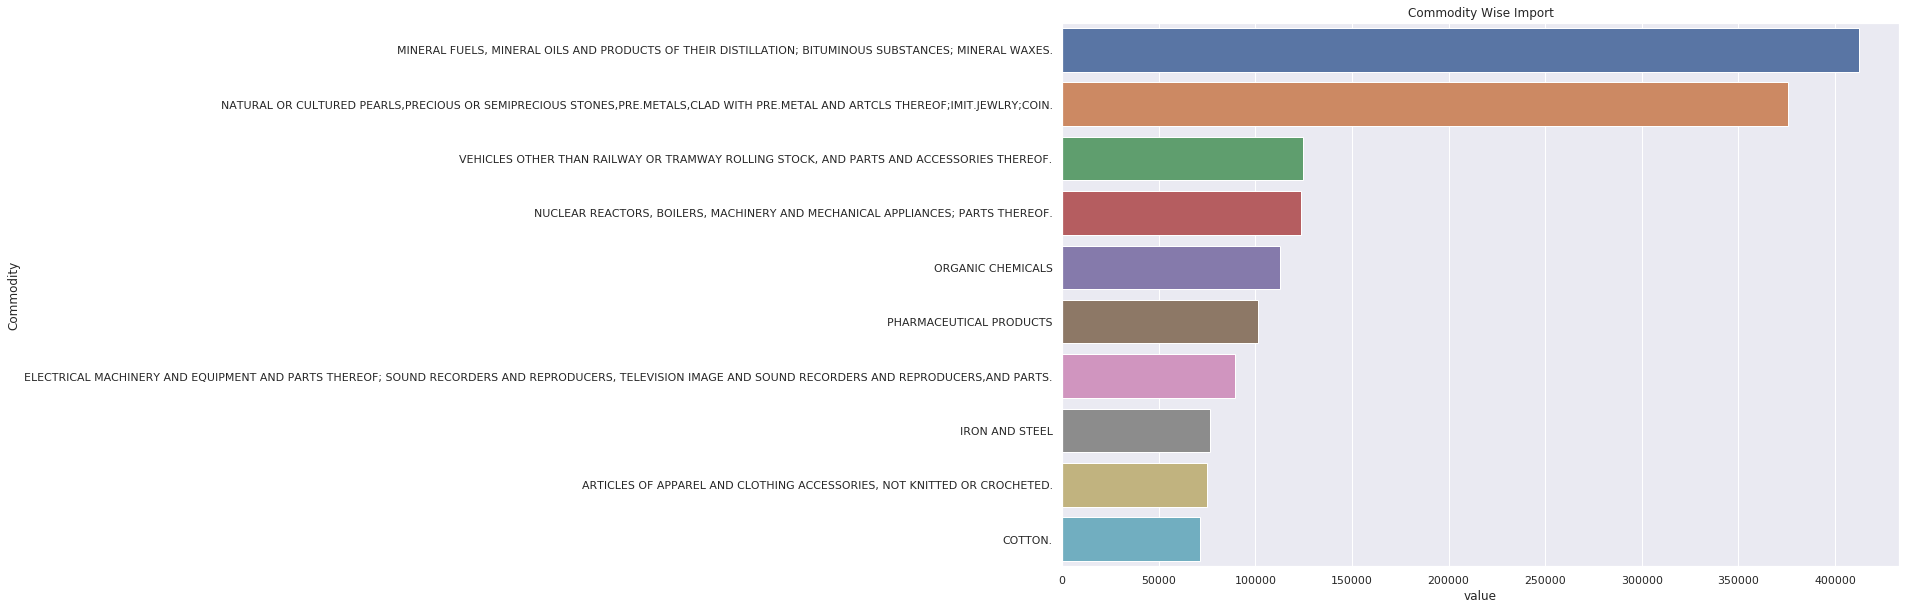

In [102]:
sns.set(rc={'figure.figsize':(15,10)})
#ax1 = plt.subplot(121)
sns.barplot(df3.value,df3.index).set_title('Commodity Wise Import')
plt.show()
#ax2 = plt.subplot(122)
sns.barplot(df4.value,df4.index).set_title('Commodity Wise Import')
plt.show()

> Top exported categories are also the top imoported categories but there is huge trade deficit category wise. aprrox for 6 category we can see more deficit.

> Vehicle Other Than railway...and Pharmaceutical product HScode Chapters shows a trade surplus.



#let's Analyse Expensive Import

As we have seen there is huge difference in distribution we will analyse some of the expensive imports


In [104]:
expensive_import = data_import[data_import.value>1000]
print(expensive_import.shape)  
expensive_import.head(10)

(623, 5)


,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


In [106]:
expensive_import.groupby('year').agg({'value':'sum'}).sort_values(by='value', ascending = False)

,value
year,
2018,349468.21
2011,347445.31
2012,346631.78
2013,312222.31
2017,301529.38
2014,294951.86
2010,247690.87
2016,240366.15
2015,233677.78


# Import Value Vs HSCode(Commodity Code)

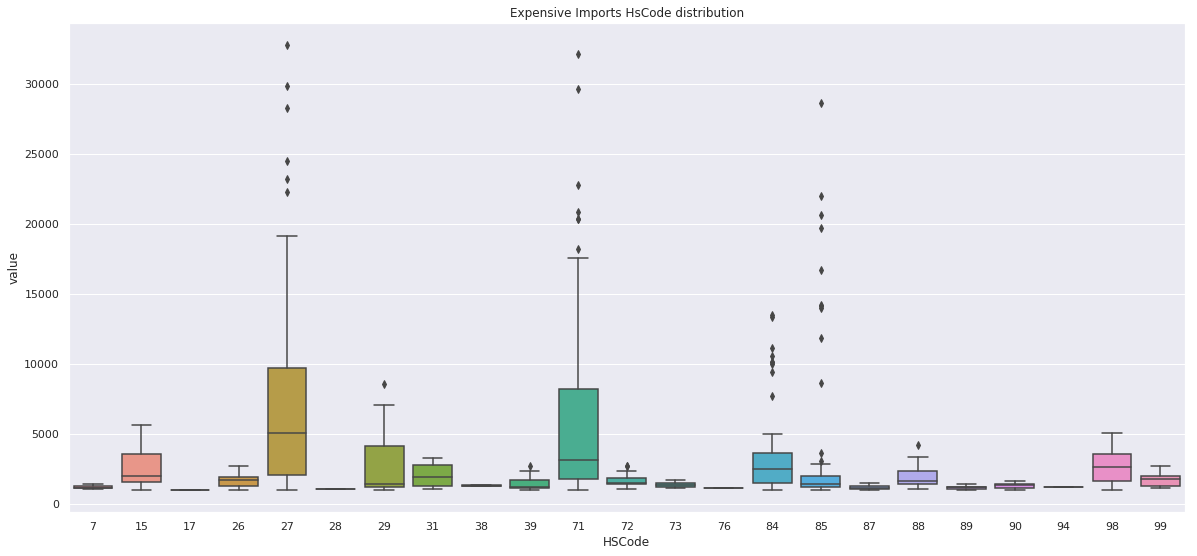

In [107]:
#fig, ax = plt.subplots(1,1,figsize=(18,6)) 
plt.figure(figsize=(20,9))
#plt.rcParams['figure.figsize']=(23,10)
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()

> HSCode Chapter 27, 71 tops the expensive import as already seen (Mineral Fuels and expensive jewellery).

> HSCode Chapter 15,29, 84, 98 also has a expensive imports.

In [108]:
df =expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
df = df.sort_values(by='value')
print(df.shape)
df.head()

(23, 1)


,value
HSCode,
17,1015.64
28,1050.23
76,1174.62
94,1200.90
38,2639.56


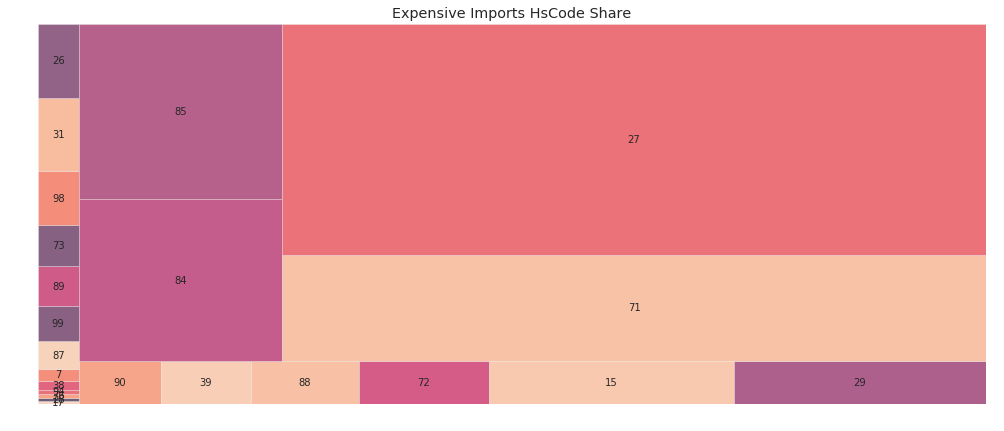

In [114]:
 
value=np.array(df)
commodityCode=df.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17.0, 7.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

#Country Analysis

In [115]:
len(expensive_import['country'].unique())

49

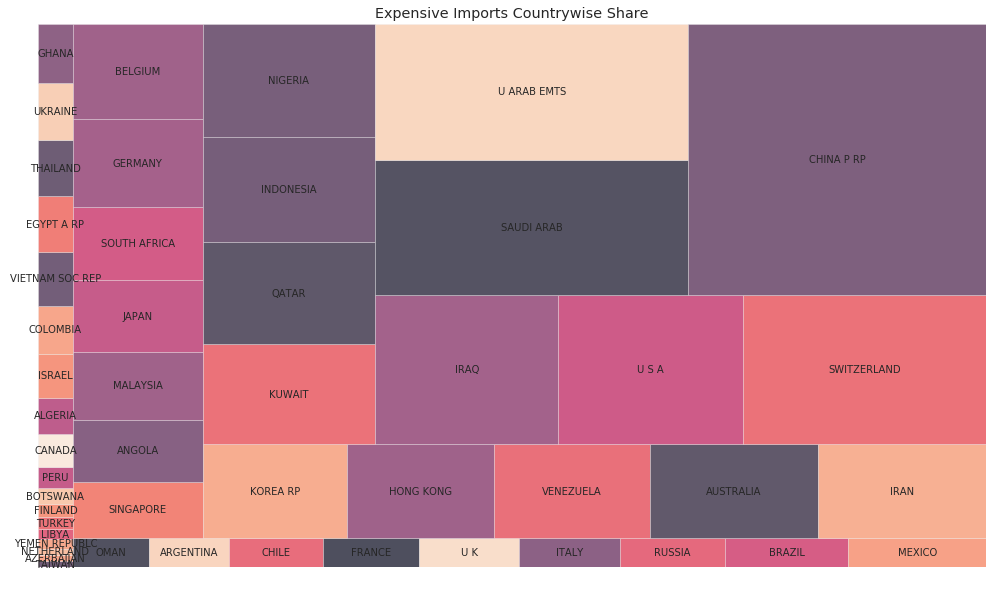

In [117]:

df1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
df1 = df1.sort_values(by='value')
value=np.array(df1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive Imports Countrywise Share")
plt.axis('off')
plt.show()

We can clearly see here INDIA is importing most expensive stffs/ commodities from CHINA , U ARAB EMTS , SAUDI ARAB ..

#Conclusive Comments

> Need of the Hour is to reduce the trade deficit. New Initiative taken by Goverment as "Skill India" , "Make In India", "Startup India" can help to boost the Export if the work is implemented on ground reality.


> Bilateral ties between countries helps to reduce export duty which help the local company compete in global market.

>As India Primarily is a Agricultural Country training and Guiding and providing export quality crops/medicinal plant can help to boost agricultural expor